# Les séries temporelles dans fct_neurology

On importe les librairies habituelles 

In [61]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

Les warnings m'embêtent toujours autant ...

In [44]:
import warnings
warnings.filterwarnings('ignore')

On importe nos tables et on les regroupe ensemble :

In [45]:
fct_neurology = pd.read_csv('fct_neurology.csv').drop(['Unnamed: 0'], axis=1)  #Il y a cette colonne qui est bizarre donc je l'enlève
dim_patient = pd.read_csv('dim_patient.csv')



dates = dim_patient[['id_patient','date_transplantation']]

df = pd.merge(fct_neurology, dates, on='id_patient')
df = df[df['time'] != '0']
df['timestamp'] = df['date_transplantation'] + '-' +df['time']


df['timestamp'] = pd.to_datetime(df['timestamp'])
df=df.drop(['time','date_transplantation'],axis=1)

Timestamp('2018-01-18 05:11:00')

In [15]:
id_patient=df['id_patient'].unique() ; id_patient

array([381, 384, 372, 377, 370, 389, 388, 383, 373, 375, 382, 368, 371,
       390, 369, 386, 379, 376, 362, 378, 391, 367, 387, 363, 364, 380,
       366, 392, 329, 323, 316, 301, 326, 311, 330, 319, 328, 314, 312,
       320, 327, 305, 325, 302, 315, 300, 309, 322, 318, 304, 308, 156,
       158, 164, 151, 163, 170, 155, 150, 171, 275, 175, 166, 172, 152,
       159, 168, 154, 153, 160, 167, 157, 161, 174, 219, 210, 232, 217,
       226, 211, 215, 223, 207, 220, 225, 218, 208, 209, 216, 224, 221,
       222, 206, 233, 213, 214, 229, 230, 227, 236, 234, 235, 231, 228,
       349, 351, 333, 354, 347, 357, 338, 346, 358, 109, 344, 359, 361,
       360, 334, 355, 342, 343, 335, 337, 336, 331, 352, 340, 356, 393,
       407, 404, 398, 400, 399, 403, 411, 410, 394, 405, 401, 397, 395,
       408, 409, 406, 396, 259, 239, 272, 267, 248, 265, 251, 245, 270,
       249, 247, 252, 263, 264, 237, 250, 269, 257, 238, 240, 246, 256,
       255, 241, 276, 271, 268, 273, 260, 243, 253, 258, 277, 24

Je veux faire une fonction qui automatise le plot des séries temps 

In [67]:
def plot_serie_patient(patient_num,variable,table=df) :
    p_neuro=df[df['id_patient']==patient_num].sort_values('timestamp')
    p_neuro['timestamp']-=p_neuro['timestamp'].iloc[0]
    p_neuro=p_neuro.set_index('timestamp')
    plt.title('Série Temporelle de la variable "'+variable+'" du patient '+str(patient_num), y=1.05, size=25)
    plt.plot(p_neuro[variable])

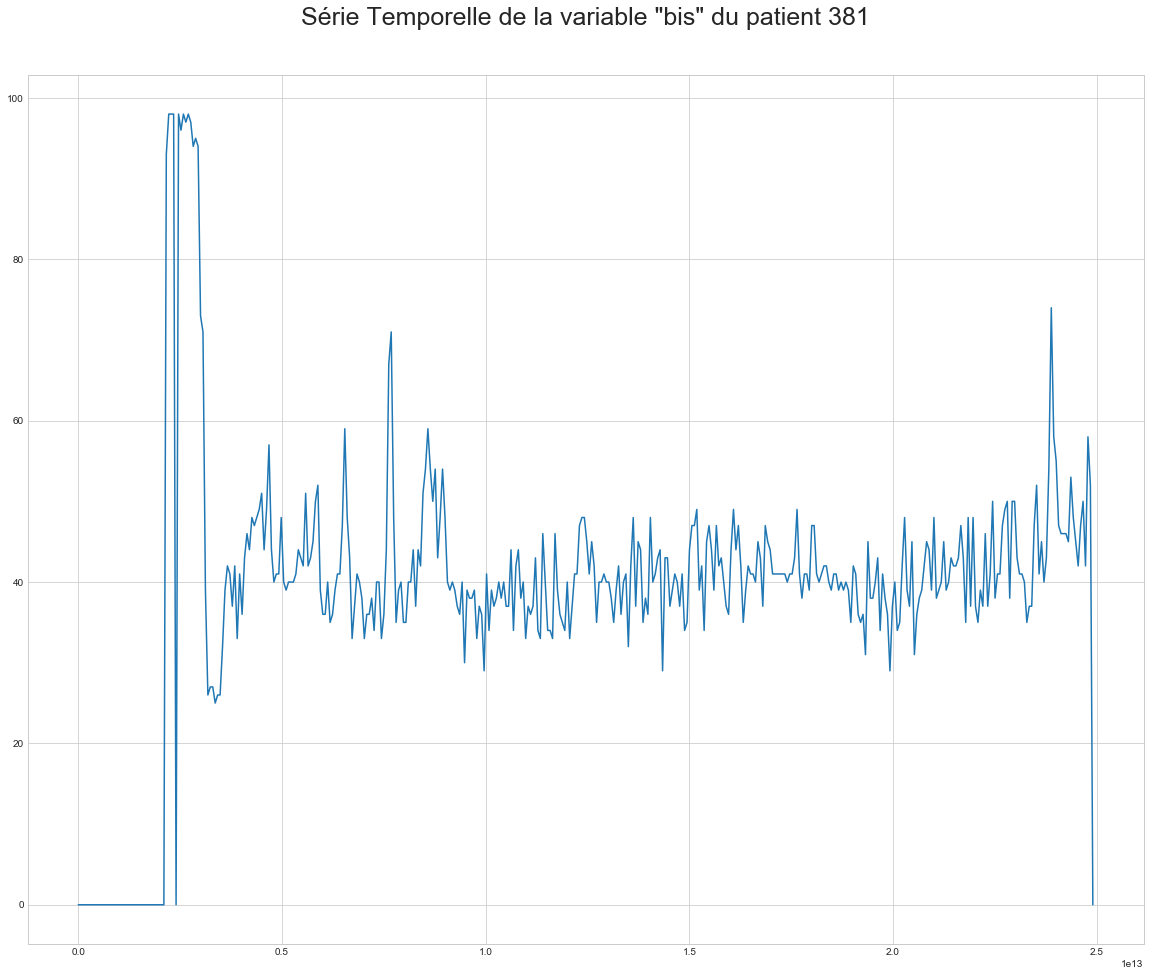

In [68]:
fig = plt.figure(figsize=(20,16))
plot_serie_patient(381,'bis')

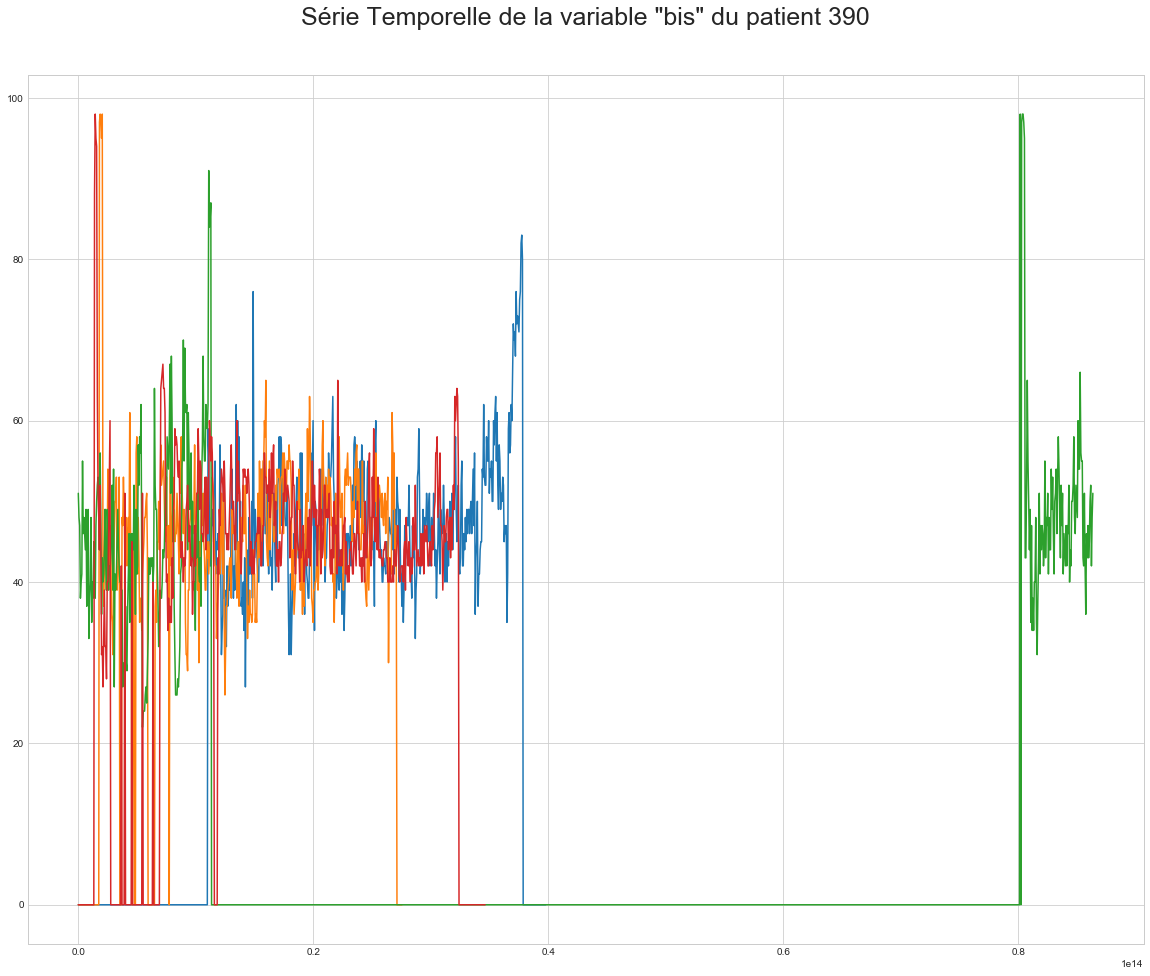

In [69]:
fig = plt.figure(figsize=(20,16))

for i in id_patient[10:14] :
    plot_serie_patient(i,'bis')